In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

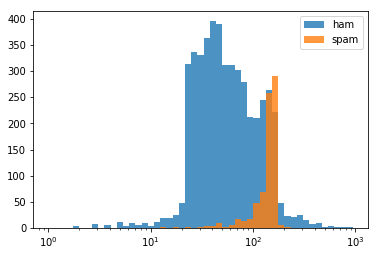

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [12]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


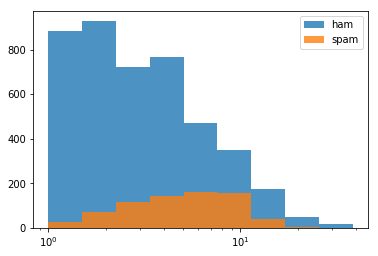

In [14]:
plt.xscale('log')
bins=1.5**(np.arange(0,10))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

x=df[['length','punct']]
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
x_train.shape

(3900, 2)

In [25]:
y_train.shape

(3900,)

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs')
lr_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
from sklearn import metrics
pred=lr_model.predict(x_test)
print(metrics.confusion_matrix(y_test,pred))


[[1404   44]
 [ 219    5]]


In [31]:
print(pd.DataFrame(metrics.confusion_matrix(y_test,pred),index=['ham','spam'], columns=['ham','spam']))

       ham  spam
ham   1404    44
spam   219     5


In [33]:
print(metrics.classification_report(y_test,pred))

             precision    recall  f1-score   support

        ham       0.87      0.97      0.91      1448
       spam       0.10      0.02      0.04       224

avg / total       0.76      0.84      0.80      1672



In [34]:
metrics.accuracy_score(y_test,pred)

0.8427033492822966

In [ ]:
#try perform df ml algos